## Introducción al Deep Learning - Feed-Forward Network

Arquitectura

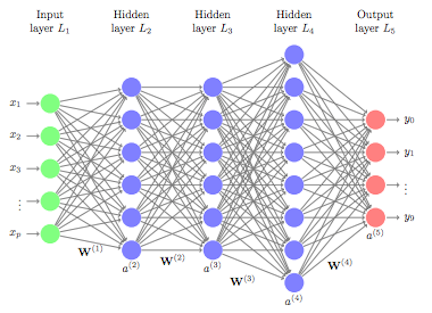

Librería


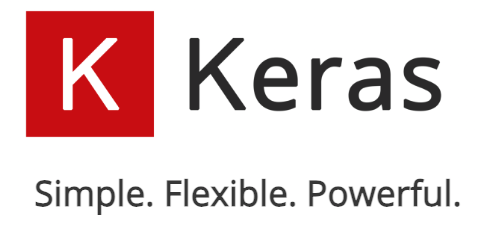


¿Qué es Keras?

- API de redes neuronales en Python.
- Modular, rápida y fácil de usar.
- Módulos totalmente configurables para crear nuevos modelos.
- Facilita la creación de capas y configuración de arquitecturas complejas.
- Soporte para varios back-ends: TensorFlow, CNTK, Theano, MXNet y PlaidML.
- Compatible con diversas opciones de despliegue en producción.
- Admite uso de varias GPU y entrenamiento distribuido.


In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import argparse

2024-02-04 15:49:00.083911: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Definición de los metodos

In [2]:
def plot_grid(X, y, grid_size, labelNames):# Define the grid size
    # Create a figure to hold the images
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 10))

    for i in range(grid_size):
        for j in range(grid_size):
            # Calculate the index into the image array
            index = i * grid_size + j
            
            # Display the image
            axes[i, j].imshow(X[index], cmap='gray')
            
            # Remove the axis
            axes[i, j].axis('off')
            
            # Add a title with the label from y_train
            axes[i, j].set_title(f'Label: {labelNames[y[index][0]]}')

    # Show the plot
    plt.show()


def print_metrics(predictions, X_test, y_test, labelNames, H, epochs):

    print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=labelNames))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Loading the CIFAR-10 Dataset

In [3]:
# Cargamos el dataset usando la API de Keras
print("[INFO] loading CIFAR-10 data...")
((X_train, y_train), (X_test, y_test)) = cifar10.load_data()

[INFO] loading CIFAR-10 data...


Analizamos los tamaños del dataset

In [4]:
print("Tamaño de X_train: ", X_train.shape[0])
print("Tamaño de X_test: ", X_test.shape[0])

print("Tamaño total del dataset: ", X_train.shape[0] + X_test.shape[0])


print("Porcentaje de datos de entrenamiento: ", X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))
print("Porcentaje de datos de test: ", X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]))


Tamaño de X_train:  50000
Tamaño de X_test:  10000
Tamaño total del dataset:  60000
Porcentaje de datos de entrenamiento:  0.8333333333333334
Porcentaje de datos de test:  0.16666666666666666


In [5]:
# Obtenemos los nombres de las clases de la base de datos
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

print("Número de clases en el dataset: ", len(labelNames))

Número de clases en el dataset:  10


In [6]:
# Contar el numero de casos diferentes en una lista
unique, counts = np.unique(y_train, return_counts=True)
print("Numero de casos y su distribucion en el dataset de entrenamiento: ", dict(zip(unique, counts)))

Numero de casos y su distribucion en el dataset de entrenamiento:  {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


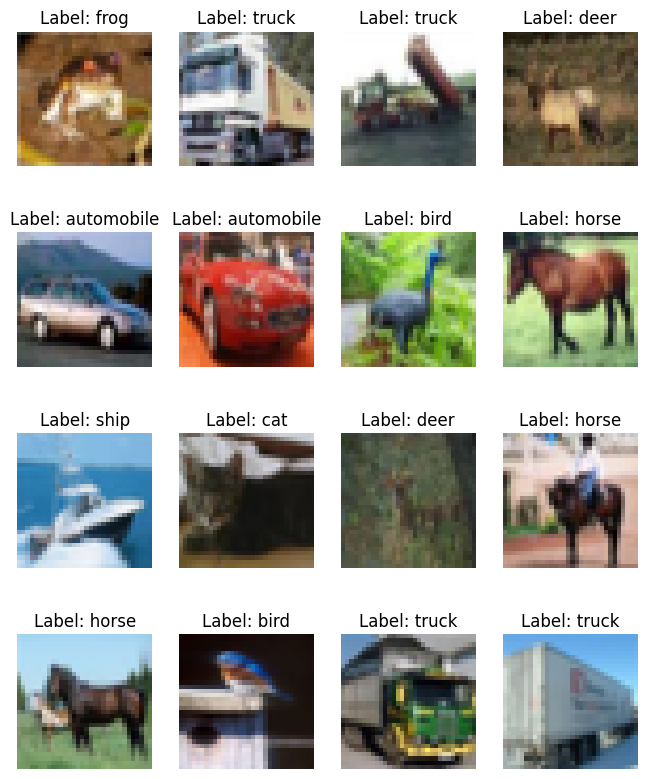

In [7]:
plot_grid(X_train, y_train, 4, labelNames)

Preparación de los datos de entrada

In [8]:
# Normalizamos los valores de la imagenes entre 0 y 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [9]:
print("Tamaño de la imagen", X_train[0].shape)
print("---------")
print("Tamaño del vector de la imagen", X_train[0].shape[0] * X_train[0].shape[1] * X_train[0].shape[2])
print("Tamaño del vector de la imagen", X_train[0].flatten().shape[0])

Tamaño de la imagen (32, 32, 3)
---------
Tamaño del vector de la imagen 3072
Tamaño del vector de la imagen 3072


In [10]:
# Convertimos las imagenes (matrices) en vectores planos de 3072 elementos
X_train = X_train.reshape((X_train.shape[0], 3072))
X_test = X_test.reshape((X_test.shape[0], 3072))

In [11]:
# Binariamos las etiquetas (one-hot encoding), conviertiendolas de un valor numerico a un vector de 10 elementos
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

print(f"Nueva estructura de las etiquetas -> {y_test[0]}")

Nueva estructura de las etiquetas -> [0 0 0 1 0 0 0 0 0 0]


### Diseño de la Red Neuronal

Llegados a este punto, hemos preparado los datos de entrada, por lo que los requisitios para el diseño de la RN serán:

 - Debe tener **3072** neuronas en la capa de **entrada**
 - Debe tener **10** neuronas en la capa de **salida**
 - Necesitamos una función de activacion de clasificacion multicalse -> **softmax**


In [12]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [13]:
sgd = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
 	epochs=50, batch_size=150)

Epoch 1/50
334/334 [==============================] - 4s 11ms/step - loss: 1.9628 - accuracy: 0.3064 - val_loss: 1.8523 - val_accuracy: 0.3499
Epoch 2/50
334/334 [==============================] - 4s 11ms/step - loss: 1.7933 - accuracy: 0.3691 - val_loss: 1.7909 - val_accuracy: 0.3655
Epoch 3/50
334/334 [==============================] - 3s 10ms/step - loss: 1.7296 - accuracy: 0.3961 - val_loss: 1.7431 - val_accuracy: 0.3929
Epoch 4/50
334/334 [==============================] - 3s 10ms/step - loss: 1.6814 - accuracy: 0.4145 - val_loss: 1.7033 - val_accuracy: 0.4064
Epoch 5/50
334/334 [==============================] - 3s 10ms/step - loss: 1.6413 - accuracy: 0.4291 - val_loss: 1.6513 - val_accuracy: 0.4131
Epoch 6/50
334/334 [==============================] - 3s 10ms/step - loss: 1.6090 - accuracy: 0.4399 - val_loss: 1.6887 - val_accuracy: 0.4002
Epoch 7/50
334/334 [==============================] - 3s 9ms/step - loss: 1.5864 - accuracy: 0.4457 - val_loss: 1.6736 - val_accuracy: 0.4032


##### Haciendo inferencia con el modelo entrenado

Usamos el modelo entrenado para precedir una imagen

Text(0.5, 1.0, 'frog')

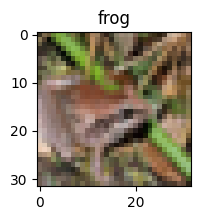

In [14]:
# Visualizamos la imagen antes de la clasificacion

index = 96

plt.figure(figsize=(2,2))
plt.imshow(X_test[index].reshape(32, 32, 3))
plt.title(labelNames[y_test[index].argmax(axis=0)])

In [15]:
# Pasamos la imagen al modelo para obtener la prediccion
prediction = model.predict(X_test[index].reshape(1, 3072))
prediction.argmax(axis=1)

print("Clase predicha para la imagen", labelNames[prediction.argmax(axis=1)[0]])

1/1 [==============================] - 0s 128ms/step
Clase predicha para la imagen bird


### Analizando el entrenamiento

In [16]:
predictions = model.predict(X_test, batch_size=150)

print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=labelNames))

67/67 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

    airplane       0.65      0.44      0.53      1000
  automobile       0.77      0.52      0.62      1000
        bird       0.24      0.79      0.37      1000
         cat       0.37      0.36      0.37      1000
        deer       0.62      0.15      0.25      1000
         dog       0.60      0.19      0.29      1000
        frog       0.57      0.56      0.56      1000
       horse       0.72      0.43      0.54      1000
        ship       0.55      0.77      0.64      1000
       truck       0.65      0.55      0.60      1000

    accuracy                           0.48     10000
   macro avg       0.57      0.48      0.48     10000
weighted avg       0.57      0.48      0.48     10000



              precision    recall  f1-score   support

    airplane       0.65      0.44      0.53      1000
  automobile       0.77      0.52      0.62      1000
        bird       0.24      0.79      0.37      1000
         cat       0.37      0.36      0.37      1000
        deer       0.62      0.15      0.25      1000
         dog       0.60      0.19      0.29      1000
        frog       0.57      0.56      0.56      1000
       horse       0.72      0.43      0.54      1000
        ship       0.55      0.77      0.64      1000
       truck       0.65      0.55      0.60      1000

    accuracy                           0.48     10000
   macro avg       0.57      0.48      0.48     10000
weighted avg       0.57      0.48      0.48     10000



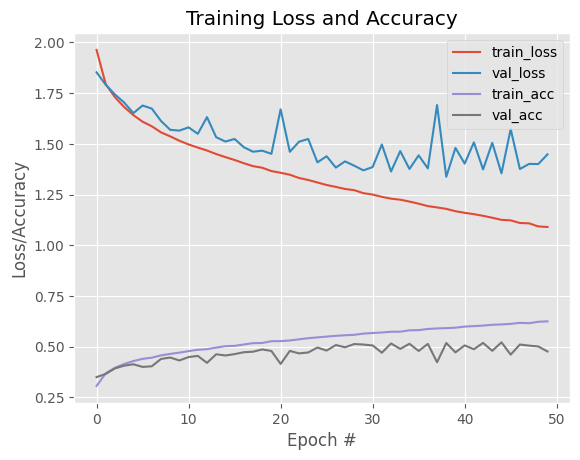

In [17]:
print_metrics(predictions, X_test, y_test, labelNames, H, 50)

Entrenamos el modelo con 500 epocas

In [18]:
## Entrenamos el modelo con mas epocas

H = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=500, batch_size=150)

Epoch 1/500
334/334 [==============================] - 3s 10ms/step - loss: 1.0818 - accuracy: 0.6266 - val_loss: 1.3509 - val_accuracy: 0.5210
Epoch 2/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0716 - accuracy: 0.6315 - val_loss: 1.3788 - val_accuracy: 0.5132
Epoch 3/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0606 - accuracy: 0.6338 - val_loss: 1.3758 - val_accuracy: 0.5181
Epoch 4/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0622 - accuracy: 0.6326 - val_loss: 1.3770 - val_accuracy: 0.5153
Epoch 5/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0551 - accuracy: 0.6358 - val_loss: 1.4158 - val_accuracy: 0.5021
Epoch 6/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0440 - accuracy: 0.6412 - val_loss: 1.5430 - val_accuracy: 0.4785
Epoch 7/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0380 - accuracy: 0.6448 - val_loss: 1.4046 - val_accuracy: 0.509

67/67 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

    airplane       0.64      0.65      0.65      1000
  automobile       0.67      0.65      0.66      1000
        bird       0.48      0.44      0.46      1000
         cat       0.40      0.38      0.39      1000
        deer       0.49      0.52      0.50      1000
         dog       0.46      0.46      0.46      1000
        frog       0.60      0.65      0.62      1000
       horse       0.61      0.61      0.61      1000
        ship       0.68      0.69      0.68      1000
       truck       0.59      0.60      0.59      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



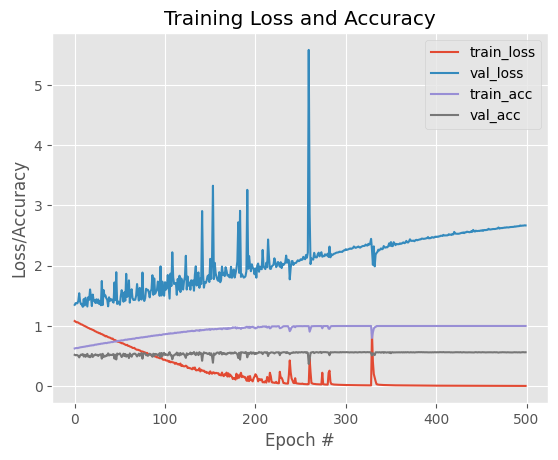

In [19]:
predictions = model.predict(X_test, batch_size=150)
print_metrics(predictions, X_test, y_test, labelNames, H, epochs=500)

In [20]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(10, activation="softmax"))

In [21]:
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=150)

Epoch 1/500
334/334 [==============================] - 4s 12ms/step - loss: 2.1920 - accuracy: 0.1955 - val_loss: 1.9830 - val_accuracy: 0.3232
Epoch 2/500
334/334 [==============================] - 4s 11ms/step - loss: 2.0262 - accuracy: 0.2599 - val_loss: 1.8971 - val_accuracy: 0.3466
Epoch 3/500
334/334 [==============================] - 4s 11ms/step - loss: 1.9589 - accuracy: 0.2893 - val_loss: 1.8332 - val_accuracy: 0.3690
Epoch 4/500
334/334 [==============================] - 4s 11ms/step - loss: 1.9113 - accuracy: 0.3104 - val_loss: 1.8125 - val_accuracy: 0.3663
Epoch 5/500
334/334 [==============================] - 4s 11ms/step - loss: 1.8837 - accuracy: 0.3213 - val_loss: 1.7680 - val_accuracy: 0.3794
Epoch 6/500
334/334 [==============================] - 4s 12ms/step - loss: 1.8506 - accuracy: 0.3344 - val_loss: 1.7647 - val_accuracy: 0.3762
Epoch 7/500
334/334 [==============================] - 4s 11ms/step - loss: 1.8252 - accuracy: 0.3457 - val_loss: 1.7194 - val_accuracy:

67/67 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

    airplane       0.63      0.61      0.62      1000
  automobile       0.73      0.58      0.65      1000
        bird       0.55      0.32      0.40      1000
         cat       0.40      0.40      0.40      1000
        deer       0.47      0.54      0.50      1000
         dog       0.54      0.36      0.43      1000
        frog       0.71      0.49      0.58      1000
       horse       0.52      0.71      0.60      1000
        ship       0.67      0.66      0.66      1000
       truck       0.45      0.80      0.58      1000

    accuracy                           0.55     10000
   macro avg       0.57      0.55      0.54     10000
weighted avg       0.57      0.55      0.54     10000



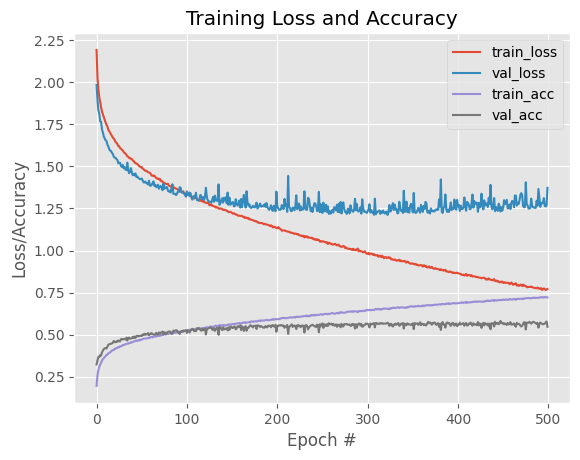

In [22]:
predictions = model.predict(X_test, batch_size=150)
print_metrics(predictions, X_test, y_test, labelNames, H, epochs=500)

### Playground

In [23]:
model_pg = Sequential()
model_pg.add(Dense(12, input_shape=(3072,), activation="relu"))
model_pg.add(Dropout(0.9))
model_pg.add(Dense(512, activation="relu"))
model_pg.add(Dropout(0.78))
model_pg.add(Dense(256, activation="relu"))
model_pg.add(Dropout(0.9))
model_pg.add(Dense(10, activation="softmax"))

In [24]:
sgd = SGD(0.01)
model_pg.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model_pg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=150)

Epoch 1/25
334/334 [==============================] - 2s 5ms/step - loss: 2.3057 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1003
Epoch 2/25
334/334 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 3/25
334/334 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/25
334/334 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1003
Epoch 5/25
334/334 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 6/25
334/334 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0953 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
334/334 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 

67/67 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       1.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.10      1.00      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.02     10000
weighted avg       0.11      0.10      0.02     10000



/home/coder/repos/poc-ence/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/coder/repos/poc-ence/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/coder/repos/poc-ence/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

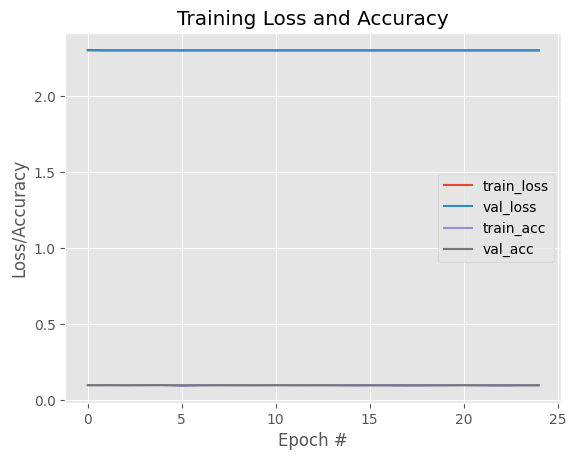

In [25]:
predictions_pg = model_pg.predict(X_test, batch_size=150)
print_metrics(predictions_pg, X_test, y_test, labelNames, H, epochs=25)